# Modeling

## Marta ---------------------------------------------------------

put all of your code between here and the next person's name only

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, f1_score, make_scorer, precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#with open('/content/drive/My Drive/Colab Notebooks/mdi_df_yr_trail.csv', 'r') as data:
#  noaa_on_fire = pd.read_csv(data)

In [ ]:
noaa_on_fire =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/mdi_df_yr_trail.csv')

In [ ]:
noaa_on_fire = pd.get_dummies(noaa_on_fire, columns=['state', 'month'], drop_first= True)

In [ ]:
noaa_on_fire.columns

Index(['Unnamed: 0', 'stat_cause_descr', 'fire_size', 'fire_size_class',
       'cont_date_fixed', 'disc_date_fixed', 'time_burnt', 'year', 'yearmonth',
       'pcp', 'tavg', 'pdsi', 'phdi', 'zndx', 'pmdi', 'cdd', 'hdd', 'sp02',
       'sp03', 'sp06', 'sp09', 'sp12', 'sp24', 'tmin', 'tmax', 'tavg_t12m',
       'tavg_t9m', 'tavg_t6m', 'tavg_t3m', 'pcp_t12m', 'pcp_t9m', 'pcp_t6m',
       'pcp_t3m', 'pmdi_t12m', 'pmdi_t9m', 'pmdi_t6m', 'pmdi_t3m', 'pdsi_t12m',
       'pdsi_t9m', 'pdsi_t6m', 'pdsi_t3m', 'state_CA', 'state_CO', 'state_ID',
       'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
       'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [ ]:
noaa_on_fire['stat_cause_descr'].unique()
not_stupidity = ['Miscellaneous',  'Railroad', 'Powerline', 'Lightning', 'Missing/Undefined', 'Fireworks']
noaa_on_fire['caused_by_stupidity'] = noaa_on_fire['stat_cause_descr'].apply(lambda x: 0 if x in not_stupidity else 1)
noaa_on_fire['caused_by_stupidity'].sum()

134952

In [ ]:
noaa_on_fire = noaa_on_fire[noaa_on_fire['caused_by_stupidity'] == 0]

In [ ]:
X_vars = ['state_CA', 'state_CO', 'state_ID',
       'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
       'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t3m', 'pcp_t12m', 'pmdi_t12m']

noaa_on_fire = noaa_on_fire.dropna(subset = X_vars)

In [ ]:
y = noaa_on_fire['fire_size']

X = noaa_on_fire[X_vars]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

stan = StandardScaler()
X_train = stan.fit_transform(X_train)
X_test = stan.transform(X_test)

REGRESSION

In [ ]:
lr = LinearRegression()
lasso = Lasso()

In [ ]:
for q in [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    print(f"Using data corresponding to fire size > {q} quantile:")
    noaa_on_fire = noaa_on_fire[noaa_on_fire['fire_size']> noaa_on_fire['fire_size'].quantile(q)]
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    stan = StandardScaler()
    X_train = stan.fit_transform(X_train)
    X_test = stan.transform(X_test)
    
    lr = LinearRegression()
    lasso = Lasso()
    
    lr.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    print(f"Linear Regression achieves R2 of {round(lr.score(X_train, y_train),4)} on train data and {round(lr.score(X_test, y_test),4)} on test data.")
    print(f"Lasso Regression achieves R2 of {round(lasso.score(X_train, y_train),4)} on train data and {round(lasso.score(X_test, y_test),4)} on test data.\n")

Using data corresponding to fire size > 0 quantile:
Linear Regression achieves R2 of 0.0027 on train data and 0.0034 on test data.
Lasso Regression achieves R2 of 0.0027 on train data and 0.0034 on test data.

Using data corresponding to fire size > 0.1 quantile:
Linear Regression achieves R2 of 0.0028 on train data and 0.003 on test data.
Lasso Regression achieves R2 of 0.0028 on train data and 0.0031 on test data.

Using data corresponding to fire size > 0.15 quantile:
Linear Regression achieves R2 of 0.0028 on train data and 0.0028 on test data.
Lasso Regression achieves R2 of 0.0028 on train data and 0.0028 on test data.

Using data corresponding to fire size > 0.2 quantile:
Linear Regression achieves R2 of 0.0029 on train data and 0.0027 on test data.
Lasso Regression achieves R2 of 0.0029 on train data and 0.0027 on test data.

Using data corresponding to fire size > 0.25 quantile:
Linear Regression achieves R2 of 0.0032 on train data and 0.0017 on test data.
Lasso Regression ach

Note: best LR with all quantiled data has R2 of 0.0016

CLASSIFICATION

In [ ]:
X_vars = ['state_CA', 'state_CO', 'state_ID',
       'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
       'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t12m',
       'tavg_t9m', 'tavg_t6m', 'tavg_t3m', 'pcp_t12m', 'pcp_t9m', 'pcp_t6m',
       'pcp_t3m', 'pmdi_t12m', 'pmdi_t9m', 'pmdi_t6m', 'pmdi_t3m', 'pdsi_t12m',
       'pdsi_t9m', 'pdsi_t6m', 'pdsi_t3m']

noaa_on_fire = noaa_on_fire.dropna(subset = X_vars)

X = noaa_on_fire[X_vars]
y = noaa_on_fire['fire_size_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

stan = StandardScaler()
X_train = stan.fit_transform(X_train)
X_test = stan.transform(X_test)

In [16]:
logr = LogisticRegression(max_iter = 10000)
logr.fit(X_train, y_train)
print(f"Logistic Regression achieves accuracy of {round(logr.score(X_train, y_train),4)} on train data and {round(logr.score(X_test, y_test),4)} on test data.")


Logistic Regression achieves accuracy of 0.6197 on train data and 0.6151 on test data.


In [17]:
recall_score(y_train, logr.predict(X_train), average = 'weighted')

0.6196530319287055

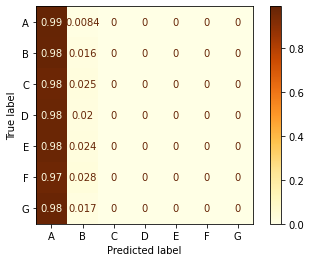

In [18]:
plot_confusion_matrix(logr, X_test, y_test, cmap = 'YlOrBr', normalize= 'true');

REGRESSION WITH BOOTSTRAPPING

Adding more representation of classes C, D, ..., G by including re-sampled observations with fire_size > 10 (which corresponds to those under-represented classes)

In [19]:
noaa_on_fire_btstrp = pd.concat([noaa_on_fire, 
                                 noaa_on_fire[noaa_on_fire['fire_size_class'] == 'C'].sample(n = 100000, replace = True, random_state=11),
                                 noaa_on_fire[noaa_on_fire['fire_size_class'] == 'D'].sample(n = 100000, replace = True, random_state=11),
                                 noaa_on_fire[noaa_on_fire['fire_size_class'] == 'E'].sample(n = 100000, replace = True, random_state=11),
                                 noaa_on_fire[noaa_on_fire['fire_size_class'] == 'F'].sample(n = 100000, replace = True, random_state=11),
                                 noaa_on_fire[noaa_on_fire['fire_size_class'] == 'G'].sample(n = 100000, replace = True, random_state=11)], axis = 0)

In [20]:
noaa_on_fire = noaa_on_fire.dropna(subset = X_vars)

X_vars = ['state_CA', 'state_CO', 'state_ID',
       'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
       'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t12m',
       'tavg_t9m', 'tavg_t6m', 'tavg_t3m', 'pcp_t12m', 'pcp_t9m', 'pcp_t6m',
       'pcp_t3m', 'pmdi_t12m', 'pmdi_t9m', 'pmdi_t6m', 'pmdi_t3m', 'pdsi_t12m',
       'pdsi_t9m', 'pdsi_t6m', 'pdsi_t3m', 'zndx', 'cdd', 'hdd']
X = noaa_on_fire_btstrp[X_vars]
y = noaa_on_fire_btstrp['fire_size_class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

stan = StandardScaler()
X_train = stan.fit_transform(X_train)
X_test = stan.transform(X_test)

In [22]:
logr_b = LogisticRegression(max_iter = 10000)
logr_b.fit(X_train, y_train)
print(f"Logistic Regression achieves accuracy of {round(logr_b.score(X_train, y_train),4)} on train data and {round(logr_b.score(X_test, y_test),4)} on test data.")

Logistic Regression achieves accuracy of 0.2549 on train data and 0.2545 on test data.


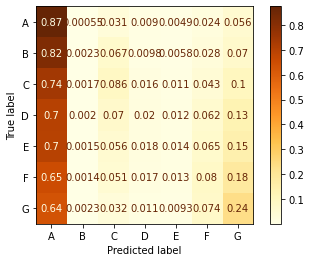

In [ ]:
plot_confusion_matrix(logr_b, X_test, y_test,cmap = 'YlOrBr', normalize = 'true');

Applying class weights to stress importance of G, F, E, D relative to smaller fires

In [23]:
LogisticRegression(class_weight = {'A':0.05, 'B': 0.05, 'C': 0.05, 'D': 0.1, 'E': 0.2, 'F': 0.25, 'G': 0.3},  max_iter = 10000, verbose = 1)
logr_w = LogisticRegression(max_iter = 10000)
logr_w.fit(X_train, y_train)
print(f"Logistic Regression achieves accuracy of {round(logr_w.score(X_train, y_train),4)} on train data and {round(logr_w.score(X_test, y_test),4)} on test data.")

Logistic Regression achieves accuracy of 0.2549 on train data and 0.2545 on test data.


In [25]:
f1_score(y_train, logr_w.predict(X_train), average = 'weighted')

0.19075727223291086

In [26]:
print(f"Logistic Regression achieves recall of {round(recall_score(y_train, logr_w.predict(X_train), average = 'weighted'),4)} on train data and {round(recall_score(y_test, logr_w.predict(X_test), average = 'weighted'),4)} on test data.")

Logistic Regression achieves recall of 0.2549 on train data and 0.2545 on test data.


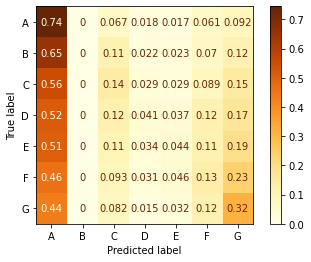

In [27]:
plot_confusion_matrix(logr_w, X_test, y_test,cmap = 'YlOrBr', normalize = 'true');

Tuning parameters to improve accuracy (recall?) - *couldn't afford to let this run to completion...*

In [ ]:
logr_w.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [28]:
params= {
    'C': np.linspace(0,1,5), 
    'solver': ['lbfgs','newton-cg', 'lbfgs', 'sag', 'saga'],
}

In [30]:
logr_gs = GridSearchCV(logr_w, param_grid = params, cv = 5, verbose = 1, n_jobs = -1 )
logr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: ignored

Changing the objective to "large" fires:

In [ ]:
noaa_on_fire_btstrp['large'] = noaa_on_fire_btstrp['fire_size'].apply(lambda x: 1 if x > 100 else 0)

In [ ]:
y = noaa_on_fire_btstrp['large']

X_vars = ['state_CA', 'state_CO', 'state_ID',
       'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
       'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t12m',
       'tavg_t9m', 'tavg_t6m', 'tavg_t3m', 'pcp_t12m', 'pcp_t9m', 'pcp_t6m',
       'pcp_t3m', 'pmdi_t12m', 'pmdi_t9m', 'pmdi_t6m', 'pmdi_t3m', 'pdsi_t12m',
       'pdsi_t9m', 'pdsi_t6m', 'pdsi_t3m', 'zndx', 'cdd', 'hdd']
X = noaa_on_fire_btstrp[X_vars]

In [ ]:
large_gts = [5, 10, 100, 300, 1000]

for l in large_gts:
    noaa_on_fire_btstrp['large'] = noaa_on_fire_btstrp['fire_size'].apply(lambda x: 1 if x > l else 0)

    y = noaa_on_fire_btstrp['large']

    X_vars = ['state_CA', 'state_CO', 'state_ID',
           'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
           'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
           'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t12m',
           'tavg_t9m', 'tavg_t6m', 'tavg_t3m', 'pcp_t12m', 'pcp_t9m', 'pcp_t6m',
           'pcp_t3m', 'pmdi_t12m', 'pmdi_t9m', 'pmdi_t6m', 'pmdi_t3m', 'pdsi_t12m',
           'pdsi_t9m', 'pdsi_t6m', 'pdsi_t3m', 'zndx', 'cdd', 'hdd']
    
    X = noaa_on_fire_btstrp[X_vars]

    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

    stan = StandardScaler()
    X_train = stan.fit_transform(X_train)
    X_test = stan.transform(X_test)

    logr_b = LogisticRegression(max_iter = 10000)
    logr_b.fit(X_train, y_train)
    print(f"When detecting fires > {l} acres, Logistic Regression achieves accuracy of {round(logr_b.score(X_train, y_train),4)} on train data and {round(logr_b.score(X_test, y_test),4)} on test data.")
    print(f"The model's recall is {round(recall_score(y_train, logr_b.predict(X_train)),4)} on train data and {round(recall_score(y_test, logr_b.predict(X_test),4))} on test data.\n")

When detecting fires > 5 acres, Logistic Regression achieves accuracy of 0.6328 on train data and 0.6327 on test data.


/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


The model's recall is 0.8297 on train data and 1 on test data.

When detecting fires > 10 acres, Logistic Regression achieves accuracy of 0.6198 on train data and 0.6189 on test data.


/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


The model's recall is 0.7757 on train data and 1 on test data.

When detecting fires > 100 acres, Logistic Regression achieves accuracy of 0.6155 on train data and 0.6165 on test data.


/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


The model's recall is 0.4205 on train data and 0 on test data.

When detecting fires > 300 acres, Logistic Regression achieves accuracy of 0.677 on train data and 0.6774 on test data.


/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


The model's recall is 0.1986 on train data and 0 on test data.

When detecting fires > 1000 acres, Logistic Regression achieves accuracy of 0.7738 on train data and 0.7737 on test data.
The model's recall is 0.0051 on train data and 0 on test data.



/Users/martalew/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


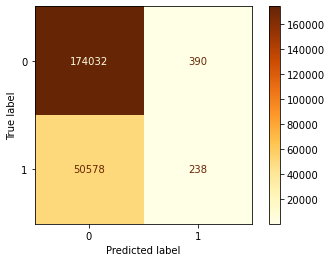

In [ ]:
plot_confusion_matrix(logr_b, X_test, y_test,cmap = 'YlOrBr');

In [ ]:
recall_score(y_test, logr_b.predict(X_test))

0.004683564231738035

SVM

In [31]:
X_vars = ['state_CA', 'state_CO', 'state_ID',
       'state_MT', 'state_NM', 'state_NV', 'state_OR', 'state_UT', 'state_WA',
       'state_WY', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12','tavg_t12m',
       'tavg_t9m', 'tavg_t6m', 'tavg_t3m', 'pcp_t12m', 'pcp_t9m', 'pcp_t6m',
       'pcp_t3m', 'pmdi_t12m', 'pmdi_t9m', 'pmdi_t6m', 'pmdi_t3m', 'pdsi_t12m',
       'pdsi_t9m', 'pdsi_t6m', 'pdsi_t3m', 'zndx', 'cdd', 'hdd']

noaa_on_fire = noaa_on_fire.dropna(subset = X_vars)

X = noaa_on_fire_btstrp[X_vars]
y = noaa_on_fire_btstrp['fire_size_class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

stan = StandardScaler()
X_train = stan.fit_transform(X_train)
X_test = stan.transform(X_test)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
print(f"Support Vector Classifier achieves accuracy of {round(svc.score(X_train, y_train),4)} on train data and {round(svc.score(X_test, y_test),4)} on test data.")

In [ ]:
plot_confusion_matrix(svc, X_test, y_test,cmap = 'YlOrBr', normalize = 'true');

## Jesse ---------------------------------------------------------

## Prepare Dataset

### Imports

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
np.random.seed(42) 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score, f1_score, make_scorer, precision_score

### Read raw dataset

In [2]:
# read dataset
model_df = pd.read_csv('data/mfi_df_yr.csv')

# Drop Unnamed: 0
model_df.drop('Unnamed: 0', axis=1, inplace=True)

#examine
model_df.head(3)

,fire_year,stat_cause_descr,fire_size,fire_size_class,state,cont_date_fixed,disc_date_fixed,time_burnt_fixed,time_burnt,month,...,cdd,hdd,sp02,sp03,sp06,sp09,sp12,sp24,tmin,tmax
0,2005,Miscellaneous,0.10,A,CA,2005-02-02,2005-02-02,0 days 00:00:00.000000000,0.0,2,...,0,421,0.58,0.85,1.00,0.92,0.24,0.48,38.1,56.1
1,2004,Lightning,0.25,A,CA,2004-05-12,2004-05-12,0 days 00:00:00.000000000,0.0,5,...,56,126,-1.19,-1.86,-0.05,-0.32,-0.31,-0.04,49.2,77.2
2,2004,Debris Burning,0.10,A,CA,2004-05-31,2004-05-31,0 days 00:00:00.000000000,0.0,5,...,56,126,-1.19,-1.86,-0.05,-0.32,-0.31,-0.04,49.2,77.2


### Bootstrap

In [3]:
#credit to Marta
model_df = pd.concat([model_df, 
                                 model_df[model_df['fire_size_class'] == 'C'].sample(n = 100000, replace = True, random_state=11),
                                 model_df[model_df['fire_size_class'] == 'D'].sample(n = 100000, replace = True, random_state=11),
                                 model_df[model_df['fire_size_class'] == 'E'].sample(n = 100000, replace = True, random_state=11),
                                 model_df[model_df['fire_size_class'] == 'F'].sample(n = 100000, replace = True, random_state=11),
                                 model_df[model_df['fire_size_class'] == 'G'].sample(n = 100000, replace = True, random_state=11)],
                     axis = 0)

### One hot encode variables

In [4]:
model_df = pd.get_dummies(model_df, columns=['month'], drop_first=True) # in relation to January
model_df = pd.get_dummies(model_df, columns=['statecode'], drop_first=True) # location matters

In [5]:
model_df.columns

Index(['fire_year', 'stat_cause_descr', 'fire_size', 'fire_size_class',
       'state', 'cont_date_fixed', 'disc_date_fixed', 'time_burnt_fixed',
       'time_burnt', 'year', 'division', 'yearmonth', 'pcp', 'tavg', 'pdsi',
       'phdi', 'zndx', 'pmdi', 'cdd', 'hdd', 'sp02', 'sp03', 'sp06', 'sp09',
       'sp12', 'sp24', 'tmin', 'tmax', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'statecode_4', 'statecode_5', 'statecode_10',
       'statecode_24', 'statecode_26', 'statecode_29', 'statecode_35',
       'statecode_45', 'statecode_110'],
      dtype='object')

### Create X, y and train, test 

In [6]:
model_df['fire_size_class'].value_counts()

A    258392
C    123168
B    121465
D    106412
E    104733
F    103801
G    102196
Name: fire_size_class, dtype: int64

In [7]:
#I don't want to dummy neighboorhood, but I do want to bin it into oridinal columns based on mean price
model_df['fire_size_class_order'] = model_df['fire_size_class']
model_df_ordinal_str_columns = model_df[['fire_size_class_order']]

dict_ordinal = {
    'A': 1,
    'B' : 2,
    'C' : 3,
    'D': 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
      }

#loop to get the job done
for i in model_df_ordinal_str_columns.columns:
    model_df.replace({i: dict_ordinal},inplace = True)

In [8]:
#create X and y variables
X = model_df[[ 'pcp', 'tavg', 'pdsi', 'phdi', 'zndx', 'pmdi', 'sp02',
       'sp03', 'sp06', 'sp09', 'sp12', 'sp24', 'tmin', 'tmax', 'month_2', 'month_3',
       'month_4', 'month_5', 'cdd', 'hdd','month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12','statecode_4', 'statecode_5', 'statecode_10',
       'statecode_24', 'statecode_26', 'statecode_29', 'statecode_35',
       'statecode_45', 'statecode_110']]
y = model_df[['fire_size_class_order']]

assert len(X) == len(y)

#split into training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2, train_size = .8, stratify = y)

In [9]:
# prepare y for confusion matrix
y_train_con = y_train
y_test_con = y_test

# prepare y for multiclass modeling
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(736133, 8)

### Standardize data

In [11]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### OPTION: Add polynomial features to capture non-linear relationships

In [26]:
transform = PolynomialFeatures(degree=2)
X_train_sc = transform.fit_transform(X_train_sc)
X_test_sc = transform.fit_transform(X_test_sc)

### OPTION: Principle Component Analysis

Explained variance (first 30 components): [0.171 0.111 0.075 0.058 0.038 0.033 0.028 0.024 0.021 0.017 0.016 0.015
 0.014 0.013 0.012 0.011 0.009 0.009 0.008 0.008]

Cumulative explained variance (first 30 components): [0.171 0.282 0.358 0.416 0.453 0.486 0.514 0.539 0.56  0.577 0.594 0.609
 0.623 0.635 0.647 0.658 0.667 0.676 0.685 0.693]


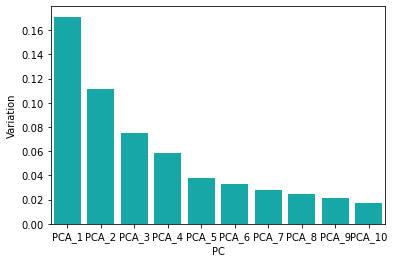

In [13]:
# # Instantiate PCA with 30 components.
# pca = PCA(n_components=30, random_state=42)

# # Fit PCA to training data.
# pca.fit(X_train_sc)

# # Transform Z_train and Z_test.
# X_train_sc = pca.transform(X_train_sc)
# X_test_sc = pca.transform(X_test_sc)

# # Pull the explained variance attribute.
# var_exp = pca.explained_variance_ratio_
# print(f'Explained variance (first 30 components): {np.round(var_exp[:20], 3)}')

# print('')

# # Generate the cumulative explained variance.
# cum_var_exp = np.cumsum(var_exp)
# print(f'Cumulative explained variance (first 30 components): {np.round(cum_var_exp[:20], 3)}')

# columns = [f'PCA_{i+1}' for i in pd.DataFrame(X_train_sc).columns]
# var_ratio_df = pd.DataFrame({'Variation':var_exp,
#              'PC':columns})
# var_ratio_df.head()
# sns.barplot(x=var_ratio_df['PC'].head(10) ,y=var_ratio_df['Variation'].head(10), 
#            data=var_ratio_df, color="c");

# Model

### Network Topology

In [29]:
#instantiate model
model = Sequential()

#input layer
n_input = X_train_sc.shape[1]

#dense layers
model.add(Dense(n_input, 
                input_dim=n_input,
                activation='relu',
                kernel_regularizer=l2(0.001)))
model.add(Dense(24, 
                input_dim=n_input,
                activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, 
                input_dim=n_input,
                activation='relu',
                ))
model.add(Dropout(0.2))

#output layer
model.add(Dense(8, activation='softmax'))

### Compile

In [30]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit

In [31]:
#fit model to dataset
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=64)

Epoch 1/10
11503/11503 [==============================] - 50s 4ms/step - loss: 2.8221 - accuracy: 0.2770 - val_loss: 1.8900 - val_accuracy: 0.2808
Epoch 2/10
11503/11503 [==============================] - 47s 4ms/step - loss: 1.8859 - accuracy: 0.2806 - val_loss: 1.8829 - val_accuracy: 0.2808
Epoch 3/10
11503/11503 [==============================] - 46s 4ms/step - loss: 1.8835 - accuracy: 0.2801 - val_loss: 1.8803 - val_accuracy: 0.2808
Epoch 4/10
11503/11503 [==============================] - 46s 4ms/step - loss: 1.8810 - accuracy: 0.2813 - val_loss: 1.8803 - val_accuracy: 0.2808
Epoch 5/10
11503/11503 [==============================] - 46s 4ms/step - loss: 1.8803 - accuracy: 0.2808 - val_loss: 1.8802 - val_accuracy: 0.2808
Epoch 6/10
11503/11503 [==============================] - 44s 4ms/step - loss: 1.8803 - accuracy: 0.2807 - val_loss: 1.8802 - val_accuracy: 0.2808
Epoch 7/10
11503/11503 [==============================] - 45s 4ms/step - loss: 1.8801 - accuracy: 0.2810 - val_loss: 1

### Model loss

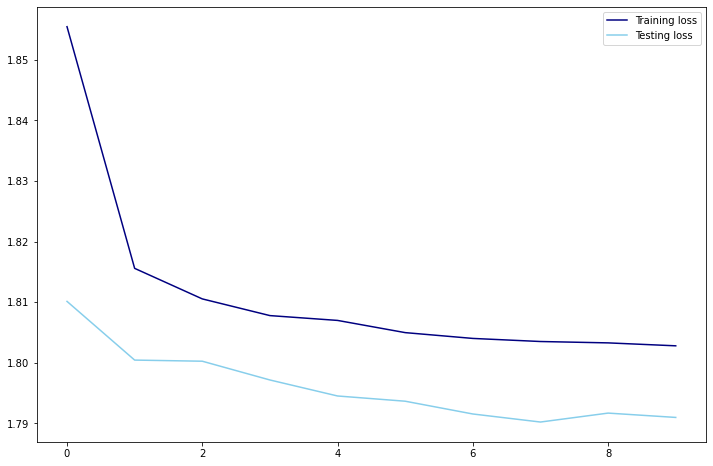

In [17]:
# Visualize loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

### Accuracy

In [18]:
history.history['accuracy'][-1],history.history['val_accuracy'][-1]

(0.3027836084365845, 0.30673137307167053)

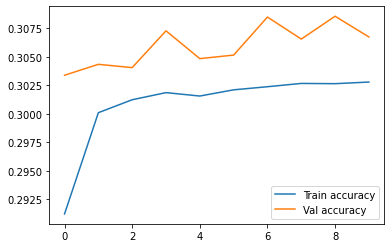

In [19]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

### Recall

In [20]:
#[None, 'micro', 'macro', 'weighted']
recall_score(y_test_con, model.predict_classes(X_test_sc), average = None)

C:\Users\jesse\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0.90887982, 0.        , 0.0669806 , 0.00173856, 0.        ,
       0.06681118, 0.3133715 ])

### Confusion Matrix

In [21]:
y_pred=model.predict_classes(X_test_sc)

In [22]:
con_mat = tf.math.confusion_matrix(labels=y_test_con, predictions=y_pred).numpy()

In [23]:
classes = ['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G']

In [24]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

con_mat_df_values = pd.DataFrame(con_mat,
                     index = classes, 
                     columns = classes)

<ipython-input-24-5f2801a7b30b>:1: RuntimeWarning: invalid value encountered in true_divide
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)


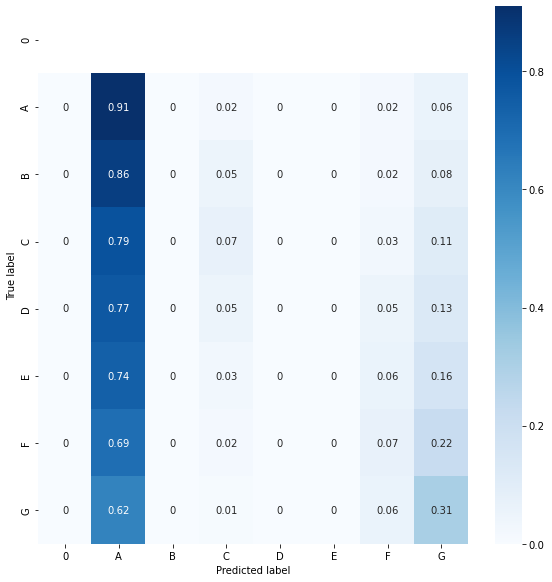

In [25]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## CM ---------------------------------------------------------

put all of your code between here and the next person's name only

## Kira ---------------------------------------------------------

put all of your code between here and the next person's name only

In [ ]:
# Import libraries.
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [ ]:
mfi_df = pd.read_csv('data/mfi_df_yr.csv')
mfi_df.head()

,Unnamed: 0,fire_year,stat_cause_descr,fire_size,fire_size_class,state,cont_date_fixed,disc_date_fixed,time_burnt_fixed,time_burnt,...,cdd,hdd,sp02,sp03,sp06,sp09,sp12,sp24,tmin,tmax
0,0,2005,Miscellaneous,0.10,A,CA,2005-02-02,2005-02-02,0 days 00:00:00.000000000,0.0,...,0,421,0.58,0.85,1.00,0.92,0.24,0.48,38.1,56.1
1,1,2004,Lightning,0.25,A,CA,2004-05-12,2004-05-12,0 days 00:00:00.000000000,0.0,...,56,126,-1.19,-1.86,-0.05,-0.32,-0.31,-0.04,49.2,77.2
2,2,2004,Debris Burning,0.10,A,CA,2004-05-31,2004-05-31,0 days 00:00:00.000000000,0.0,...,56,126,-1.19,-1.86,-0.05,-0.32,-0.31,-0.04,49.2,77.2
3,3,2004,Lightning,0.10,A,CA,2004-07-03,2004-06-28,5 days 00:00:00.000000000,5.0,...,115,44,-1.10,-1.39,-0.61,-0.32,-0.29,-0.04,55.6,85.2
4,4,2004,Lightning,0.10,A,CA,2004-07-03,2004-06-28,5 days 00:00:00.000000000,5.0,...,115,44,-1.10,-1.39,-0.61,-0.32,-0.29,-0.04,55.6,85.2


In [ ]:
mfi_df.columns

Index(['Unnamed: 0', 'fire_year', 'stat_cause_descr', 'fire_size',
       'fire_size_class', 'state', 'cont_date_fixed', 'disc_date_fixed',
       'time_burnt_fixed', 'time_burnt', 'month', 'year', 'statecode',
       'division', 'yearmonth', 'pcp', 'tavg', 'pdsi', 'phdi', 'zndx', 'pmdi',
       'cdd', 'hdd', 'sp02', 'sp03', 'sp06', 'sp09', 'sp12', 'sp24', 'tmin',
       'tmax'],
      dtype='object')

In [ ]:
list(mfi_df.columns.values)

['Unnamed: 0',
 'fire_year',
 'stat_cause_descr',
 'fire_size',
 'fire_size_class',
 'state',
 'cont_date_fixed',
 'disc_date_fixed',
 'time_burnt_fixed',
 'time_burnt',
 'month',
 'year',
 'statecode',
 'division',
 'yearmonth',
 'pcp',
 'tavg',
 'pdsi',
 'phdi',
 'zndx',
 'pmdi',
 'cdd',
 'hdd',
 'sp02',
 'sp03',
 'sp06',
 'sp09',
 'sp12',
 'sp24',
 'tmin',
 'tmax']

In [ ]:
# Drop the `Unnamed: 0` column.
mfi_df.drop('Unnamed: 0', axis=1, inplace=True)

# Drop NAs.
# df.dropna(inplace=True)

In [ ]:
# Create dummies for the `ChestPain`, `Thal`, and `AHD` columns.
# Be sure to set `drop_first=True`.
mfi_df = pd.get_dummies(mfi_df,
                    columns=['stat_cause_descr', 'state'],
                    drop_first=True)

In [ ]:
mfi_df.drop(columns=['fire_year', 'cont_date_fixed', 
                        'disc_date_fixed', 'time_burnt', 
                        'statecode',
                        'division', 'yearmonth'],
                        axis = 1,
                        inplace = True)

In [ ]:
mfi_df.head()

,fire_size,fire_size_class,time_burnt_fixed,month,year,pcp,tavg,pdsi,phdi,zndx,...,state_CA,state_CO,state_ID,state_MT,state_NM,state_NV,state_OR,state_UT,state_WA,state_WY
0,0.10,A,0 days 00:00:00.000000000,2,2005,4.03,47.1,2.28,2.28,0.56,...,1,0,0,0,0,0,0,0,0,0
1,0.25,A,0 days 00:00:00.000000000,5,2004,0.45,63.2,-2.15,-2.15,-1.89,...,1,0,0,0,0,0,0,0,0,0
2,0.10,A,0 days 00:00:00.000000000,5,2004,0.45,63.2,-2.15,-2.15,-1.89,...,1,0,0,0,0,0,0,0,0,0
3,0.10,A,5 days 00:00:00.000000000,6,2004,0.08,70.4,-2.80,-2.80,-2.62,...,1,0,0,0,0,0,0,0,0,0
4,0.10,A,5 days 00:00:00.000000000,6,2004,0.08,70.4,-2.80,-2.80,-2.62,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Define X and y.
X = mfi_df.drop(columns=['fire_size']).select_dtypes(include=['float64'])
y = mfi_df['fire_size'].to_numeric()

AttributeError: 'Series' object has no attribute 'to_numeric'

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                   )

In [ ]:
# What is the accuracy of our baseline model?
y.value_counts(normalize=True)

In [ ]:
# Instantiate `RandomForestClassifier` object.
rf = RandomForestClassifier(n_estimators=100)
et = ExtraTreesClassifier(n_estimators=100)

rf.fit(X_train, y_train)

In [ ]:
# Fit and score on the training data.
cross_val_score(rf, X_train, y_train, cv=5).mean()

In [ ]:
# Fit and score on the training data.
cross_val_score(et, X_train, y_train, cv=5).mean()

In [ ]:
# Score on the testing data.
tree.score(X_test, y_test)

In [ ]:
# Generate one bootstrapped sample
# of size n from X_train.

X_train.sample(n = X_train.shape[0],
               replace = True,
               random_state = 42)

def bootstrap(data, num_B):
    # Create empty list for output.
    output = []
    
    # Generate num_B bootstrapped samples.
    for B in range(num_B):
        
        # Each sample is sampled from data with
        # the same sample size as the original
        # data, and samples with replacement.
        bootstrapped_sample = data.sample(n = data.shape[0],
                                        replace = True)
        
        # Append sample to list.
        output.append(bootstrapped_sample)
        
    # Returns num_B bootstrapped samples in list.
    return output

# Adapted from Boom D. - NYC


In [ ]:
# Set seed for reproducibility.
np.random.seed(42)

# Generate five bootstrapped samples from X_train.
boot_samp = bootstrap(X_train, 5)

# Plot cholesterol level for each bootstrapped sample.
for B in range(5):
    plt.figure(figsize = (9,6))
    plt.hist(boot_samp[B]['Chol'])
    plt.title(f'Bootstrapped Sample {B + 1} of Cholesterol Level');